In [4]:
import pandas as pd

# Mengambil data dari URL
url = "https://raw.githubusercontent.com/JasonJTX/Data-Analytics/refs/heads/main/VideoGameSales/vgsales.csv"
df = pd.read_csv(url)

# Mengubah tipe data kolom 'Year' dan 'Rank' menjadi string
df['Year'] = df['Year'].astype(str)
df['Rank'] = df['Rank'].astype(str)

# Menampilkan 10 baris pertama data menggunakan display()
print("\nContoh data:")
display(df.head(10))

# Statistik deskriptif sederhana
print("\n\nStatistik Deskriptif:")
display(df.describe())

# Info tentang dataset
print("\n\nInformasi dataset:")
display(df.info())


Contoh data:


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31




Statistik Deskriptif:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000




Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  object 
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  object 
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), object(6)
memory usage: 1.4+ MB


None

In [5]:
# Mengecek nilai yang hilang
print("\nJumlah nilai yang hilang per kolom:")
display(df.isnull().sum().to_frame().style.highlight_null(color='red'))

# Menghapus baris yang memiliki nilai null
df_clean = df.dropna()

# Mengecek apakah masih ada nilai yang hilang setelah pembersihan
print("\n\nJumlah nilai yang hilang setelah pembersihan:")
display(df_clean.isnull().sum().to_frame().style.highlight_null(color='red'))





Jumlah nilai yang hilang per kolom:


,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0




Jumlah nilai yang hilang setelah pembersihan:


,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


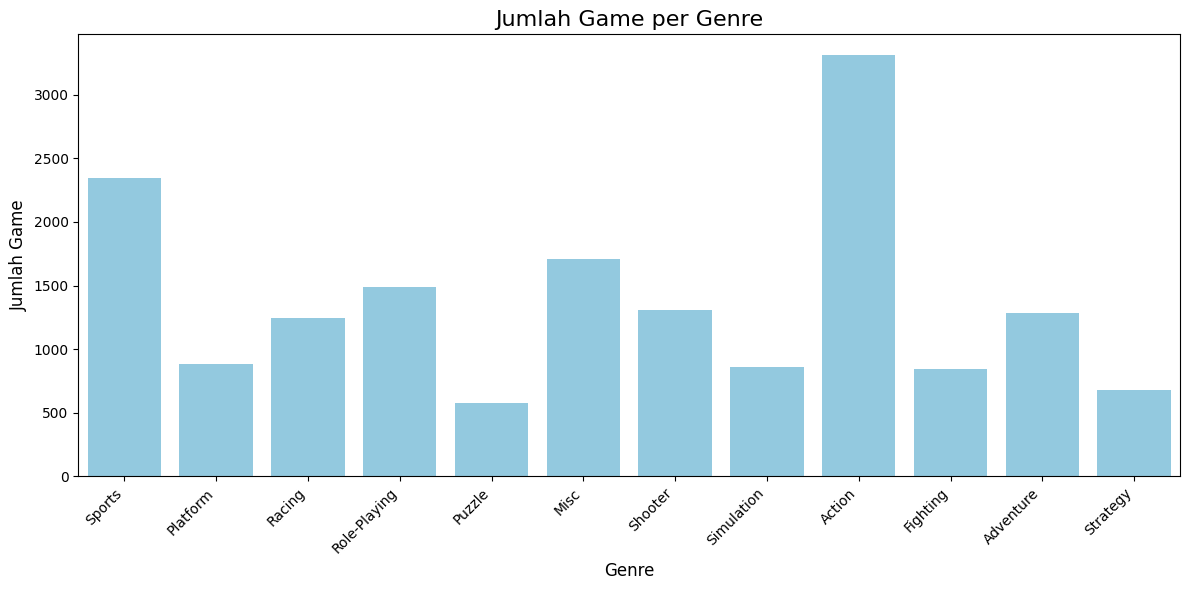

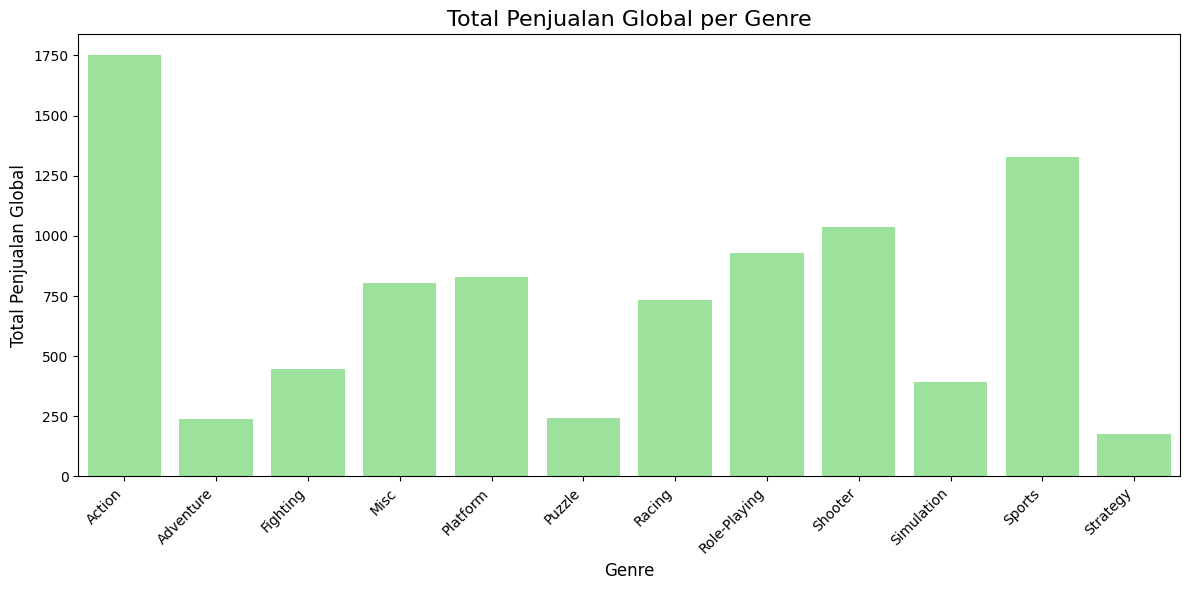

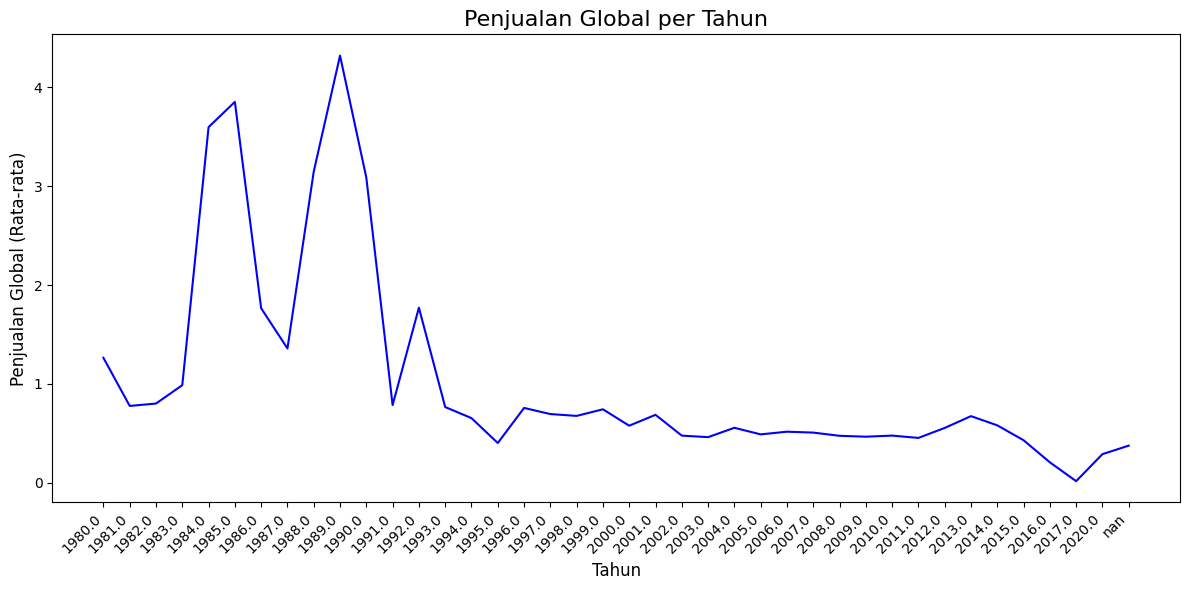

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi data
plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=df_clean, color='skyblue')  # Menggunakan warna skyblue
plt.title('Jumlah Game per Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Jumlah Game', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Perhitungan total penjualan global per genre
sales_per_genre = df_clean.groupby('Genre')['Global_Sales'].sum().reset_index()

# Visualisasi penjualan global per genre
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Global_Sales', data=sales_per_genre, color='lightgreen')
plt.title('Total Penjualan Global per Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Penjualan Global', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Perhitungan rata-rata penjualan global per tahun
sales_per_year = df_clean.groupby('Year')['Global_Sales'].mean().reset_index()

# Visualisasi penjualan global per tahun
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Global_Sales', data=sales_per_year, color='blue')
plt.title('Penjualan Global per Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Penjualan Global (Rata-rata)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

